In [1]:
pip install sympy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource
from IPython.display import display, Math
from mpl_toolkits.mplot3d import Axes3D  # Importar Axes3D



In [3]:
# Definición de variables
x, y = sp.symbols('x y')

# Definir las funciones de dos variables
function_x = x**3*y + x + 2*y  # Función f(x, y)

# Calcular las derivadas parciales de f
partial_x = sp.diff(function_x, x)  # Derivada parcial de f con respecto a x
partial_y = sp.diff(function_x, y)  # Derivada parcial de f con respecto a x

partial_xx = sp.diff(partial_x, x) # SEgunda derivada parcial respecto a x
partial_yy = sp.diff(partial_y, y) # Segunda derivada parcial respecto a y
partial_xy = sp.diff(partial_x, y) # Derivada mixta 
partial_yx = sp.diff(partial_y, x) # Derivada mixta 2


# Mostrar las derivadas parciales de f
display(Math(r"\dfrac{\partial f}{\partial x} = " + sp.latex(partial_x)))
display(Math(r"\dfrac{\partial f}{\partial y} = " + sp.latex(partial_y)))
display(Math(r"\dfrac{\partial^2 f}{\partial x^2} = " + sp.latex(partial_xx)))
display(Math(r"\dfrac{\partial^2 f}{\partial y^2} = " + sp.latex(partial_yy)))
display(Math(r"\dfrac{\partial^2 f}{\partial x \partial y} = " + sp.latex(partial_xy)))
display(Math(r"\dfrac{\partial^2 f}{\partial y \partial x} = " + sp.latex(partial_yx)))

# Generar la matriz jacobiana
hessian_matrix = sp.Matrix([[partial_xx, partial_xy], [partial_yx, partial_yy]])

# Mostrar la matriz jacobiana en formato LaTeX
display(Math(r"H = " + sp.latex(hessian_matrix)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Convertir las funciones simbólicas a funciones numéricas
numeric_f = sp.lambdify([x, y], function_x, 'numpy')

# Convertir las derivadas parciales de u a funciones numéricas
numeric_f_x = sp.lambdify([x, y], partial_x, 'numpy')
numeric_f_y = sp.lambdify([x, y], partial_y, 'numpy')

# Generar datos para las gráficas
x_range = np.linspace(-20, 20, 25)  # Rango de valores para x
y_range = np.linspace(-20, 20, 25)  # Rango de valores para y
X, Y = np.meshgrid(x_range, y_range)  # Crear malla de valores

# Evaluar la función u en los datos generados
Z = numeric_f(X, Y)
Z_x = numeric_f_x(X, Y)
Z_y = numeric_f_y(X, Y)

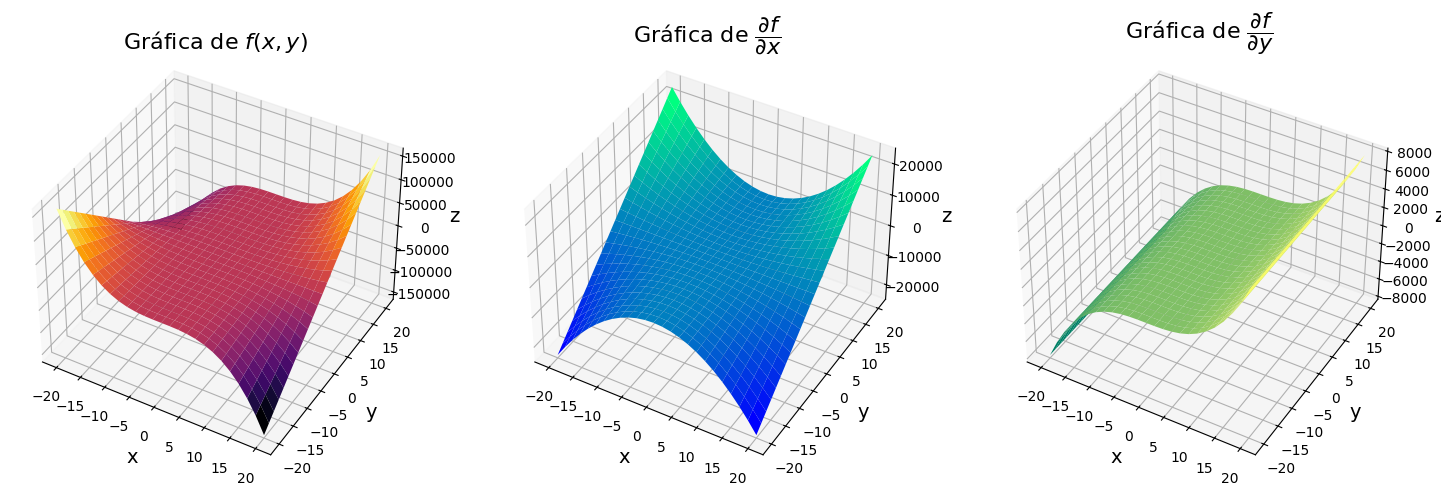

In [10]:
# Crear figura f(x,y)
fig = plt.figure(figsize=(18, 15))  # Ajusta el tamaño si es necesario

# Graficar la función f(x, y) en 3D
f_3d = fig.add_subplot(231, projection='3d')
f_3d.plot_surface(X, Y, Z, cmap="inferno", edgecolor='none')
f_3d.set_title('Gráfica de $f(x,y)$', fontsize=16)
f_3d.set_xlabel('x', fontsize=14)
f_3d.set_ylabel('y', fontsize=14)
f_3d.set_zlabel('z', fontsize=14)
f_3d.view_init(elev=40)

# Graficar la función fx en 3D
f_x_3d = fig.add_subplot(232, projection='3d')
f_x_3d.plot_surface(X, Y, Z_x, cmap="winter", edgecolor='none')
f_x_3d.set_title('Gráfica de $\dfrac{\partial f}{\partial x}$', fontsize=16)
f_x_3d.set_xlabel('x', fontsize=14)
f_x_3d.set_ylabel('y', fontsize=14)
f_x_3d.set_zlabel('z', fontsize=14)
f_x_3d.view_init(elev=40)

# Graficar la función fy en 3D
f_y_3d = fig.add_subplot(233, projection='3d')
f_y_3d.plot_surface(X, Y, Z_y, cmap="summer", edgecolor='none')
f_y_3d.set_title('Gráfica de $\dfrac{\partial f}{\partial y}$', fontsize=16)
f_y_3d.set_xlabel('x', fontsize=14)
f_y_3d.set_ylabel('y', fontsize=14)
f_y_3d.set_zlabel('z', fontsize=14)
f_y_3d.view_init(elev=40)

plt.show()


In [11]:
# Convertir las derivadas parciales de segundo orden simbolicas a funciones numéricas
numeric_f_xx = sp.lambdify([x, y], partial_xx, 'numpy')
numeric_f_yy = sp.lambdify([x, y], partial_yy, 'numpy')
numeric_f_xy = sp.lambdify([x, y], partial_xy, 'numpy')
numeric_f_yx = sp.lambdify([x, y], partial_yx, 'numpy')

# Evaluar la función f en los datos generados
Z_xx = numeric_f_xx(X, Y)
Z_yy = numeric_f_yy(X, Y)
Z_xy = numeric_f_xy(X, Y)
Z_yx = numeric_f_yx(X, Y)


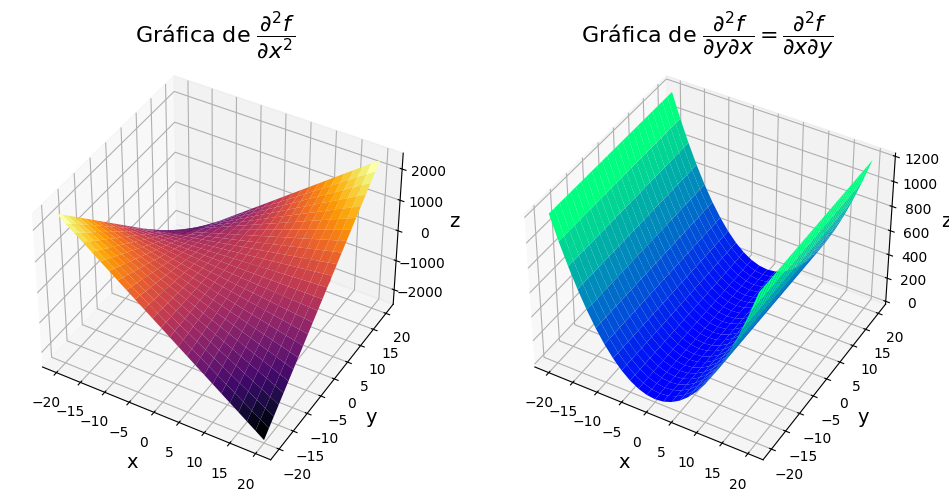

In [12]:
# Crear figura f(x,y)
fig = plt.figure(figsize=(18, 15))  # Ajusta el tamaño si es necesario

# Graficar la función fxx en 3D
f_xx_3d = fig.add_subplot(231, projection='3d')
f_xx_3d.plot_surface(X, Y, Z_xx, cmap="inferno", edgecolor='none')
f_xx_3d.set_title('Gráfica de $\dfrac{\partial^2 f}{\partial x^2}$', fontsize=16)
f_xx_3d.set_xlabel('x', fontsize=14)
f_xx_3d.set_ylabel('y', fontsize=14)
f_xx_3d.set_zlabel('z', fontsize=14)
f_xx_3d.view_init(elev=40)

# Graficar la función fxy en 3D
f_xy_3d = fig.add_subplot(232, projection='3d')
f_xy_3d.plot_surface(X, Y, Z_xy, cmap="winter", edgecolor='none')
f_xy_3d.set_title('Gráfica de $\dfrac{\partial^2 f}{\partial y \partial x} = \dfrac{\partial^2 f}{\partial x \partial y}$', fontsize=16)
f_xy_3d.set_xlabel('x', fontsize=14)
f_xy_3d.set_ylabel('y', fontsize=14)
f_xy_3d.set_zlabel('z', fontsize=14)
f_xy_3d.view_init(elev=40)

plt.show()

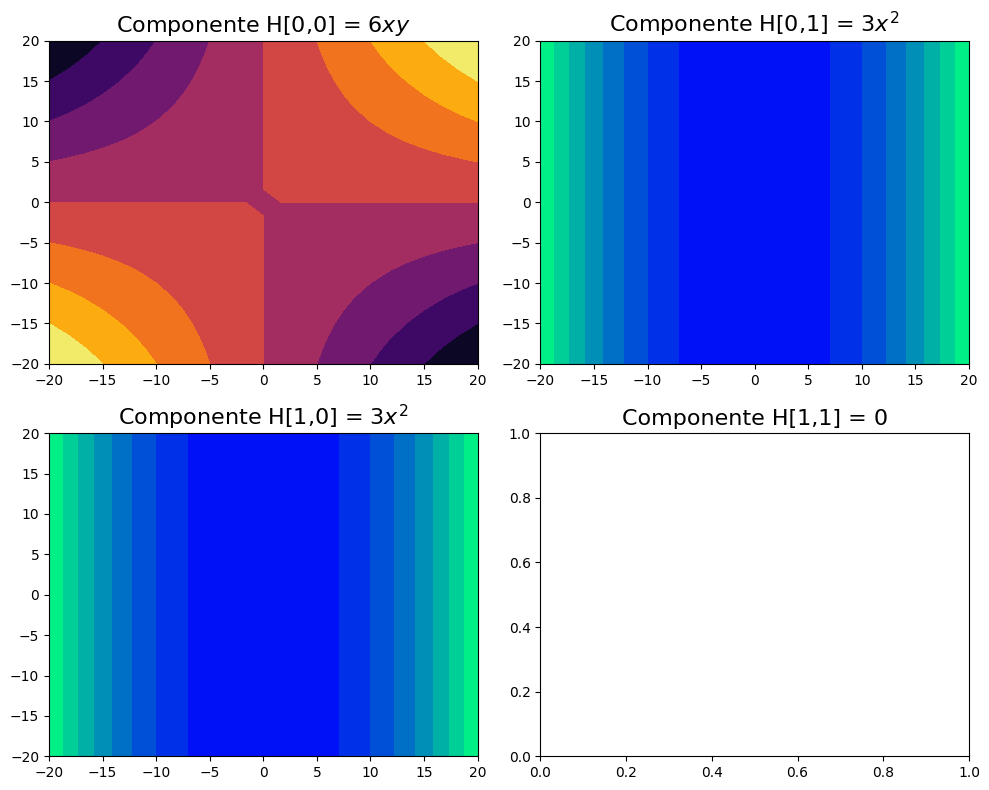

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].contourf(X, Y, Z_xx, cmap='inferno')
axs[0, 0].set_title('Componente H[0,0] = $6xy$', fontsize=16)

axs[0, 1].contourf(X, Y, Z_xy, cmap='winter')
axs[0, 1].set_title('Componente H[0,1] = $3x^{2}$', fontsize=16)

axs[1, 0].contourf(X, Y, Z_yx, cmap='winter')
axs[1, 0].set_title('Componente H[1,0] = $3x^{2}$', fontsize=16)

axs[1, 1].set_title('Componente H[1,1] = 0', fontsize=16)

plt.tight_layout()
plt.show()